This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_table('iris_not_clean.data', sep='|', skiprows = [1, 34], 
                   names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
#print(df.head(50))
numRows = len(df)
numCols = len(df.columns)
print("There are " + str(numRows) + " rows and " + str(numCols) + " columns.")

null_count = df.isna().sum().sum() # Getting the total null values by finding the null in each column then sums the total
print("There are " + str(null_count) + " nulls in the file.\n")

print("Rows with null values")
null_row = df[df.isna().any(axis = 1)] #Finding which row that has null values
print(null_row)

index28 = df.iloc[[28]].isna().sum().sum() #counting the number of nulls at index 28
print("Index 28 has " + str(index28) + " null values.")

index29 = df.iloc[[29]].isna().sum().sum() #counting the number of nulls at index 29
print("Index 29 has " + str(index29) + " null values.")

index44 = df.iloc[[44]].isna().sum().sum() #counting the number of nulls iat index 44
print("Index 44 has " + str(index44) + " null values.\n")

nulls_columns = df.isna().sum() #Finding the number of nulls in each column
print("\nNumber of null values in each column")
print(nulls_columns)

#print(df.iloc[35]) #displaying the 36th sample
df.at[35, 'petal width'] = 0.2 #fixing the 4th element
print("\n36th sample")
print(df.iloc[35])

#print(df.iloc[38]) #displaying the 39th sample
print("\n39th sample")
df.at[38, ['sepal width', 'petal length']] = [3.6, 1.4] #fixing the 2nd and 3rd elements
print(df.iloc[38]) 

There are 153 rows and 5 columns.
There are 9 nulls in the file.

Rows with null values
    sepal length  sepal width  petal length  petal width        class
28           5.2          3.4           NaN          0.2  Iris-setosa
29           NaN          NaN           NaN          NaN          NaN
44           NaN          3.2           2.1          NaN          NaN
Index 28 has 1 null values.
Index 29 has 5 null values.
Index 44 has 3 null values.


Number of null values in each column
sepal length    2
sepal width     1
petal length    2
petal width     2
class           2
dtype: int64

36th sample
sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.2
class           Iris-setosa
Name: 35, dtype: object

39th sample
sepal length            4.9
sepal width             3.6
petal length            1.4
petal width             0.1
class           Iris-setosa
Name: 38, dtype: object


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

Mean for sepal length: 5.833775 cm
Variance for sepal length: 0.694918 cm

Mean for sepal width: 3.060526 cm
Variance for sepal width: 0.188365 cm

Mean for petal length: 3.746358 cm
Variance for petal length: 3.116903 cm

Mean for petal width: 1.192715 cm
Variance for petal width: 0.583747 cm

UPDATED MEAN AND VARIANCE BELOW

New Mean for sepal length: 5.838 cm
New Variance for sepal length: 0.696868 cm

New Mean for sepal width: 3.057333 cm
New Variance for sepal width: 0.189979 cm

New Mean for petal length: 3.757333 cm
New Variance for petal length: 3.11951 cm

New Mean for petal width: 1.199333 cm
New Variance for petal width: 0.581006 cm

Correlation between petal width and sepal length: 0.8197887354629184
Correlation between petal width and sepal width: -0.366125932536439
Correlation between petal width and petal length: 0.9628647296230709

The correlation between petal width and petal length shows the strongest correlation 
compared to the other elements. It shows a positive li

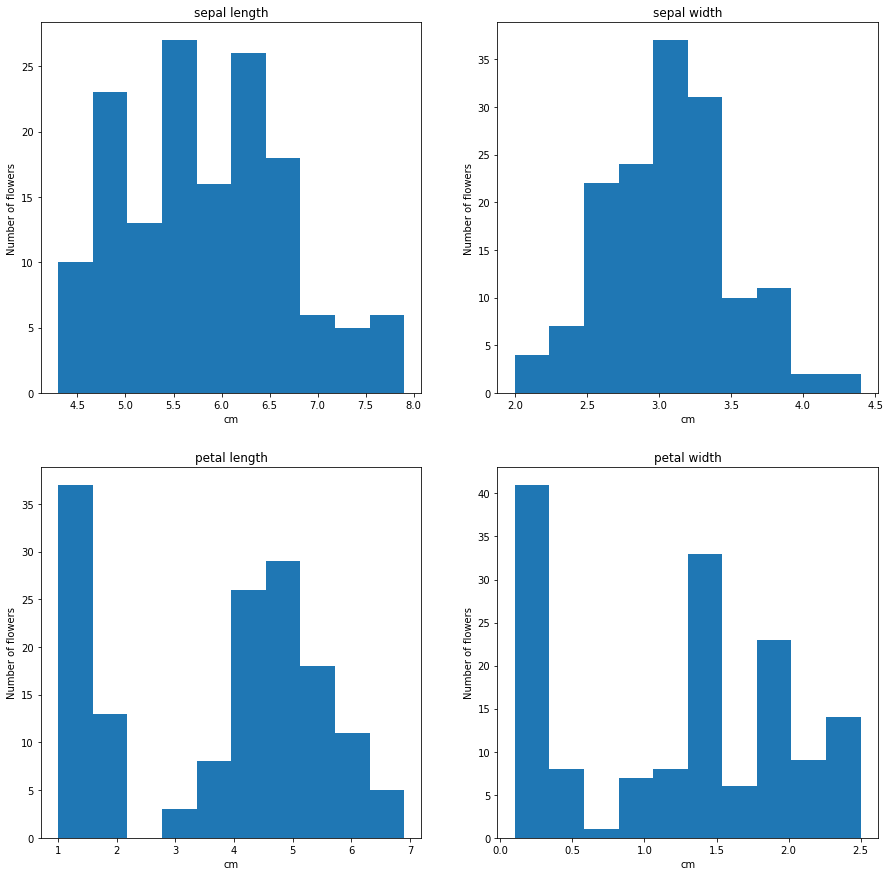

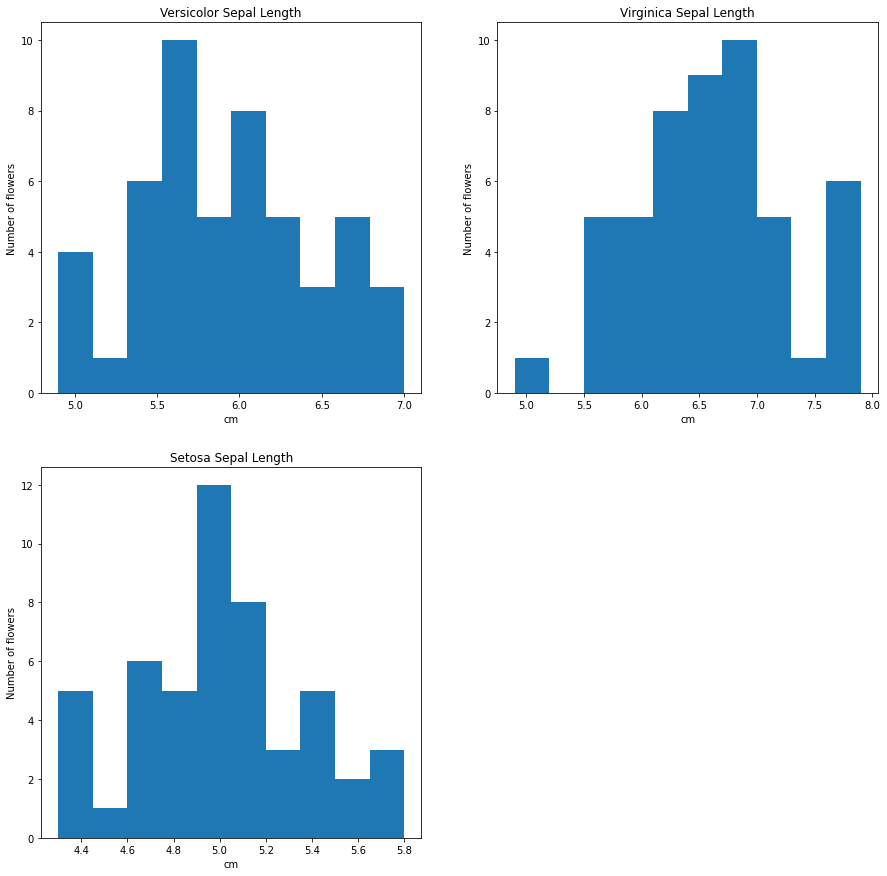

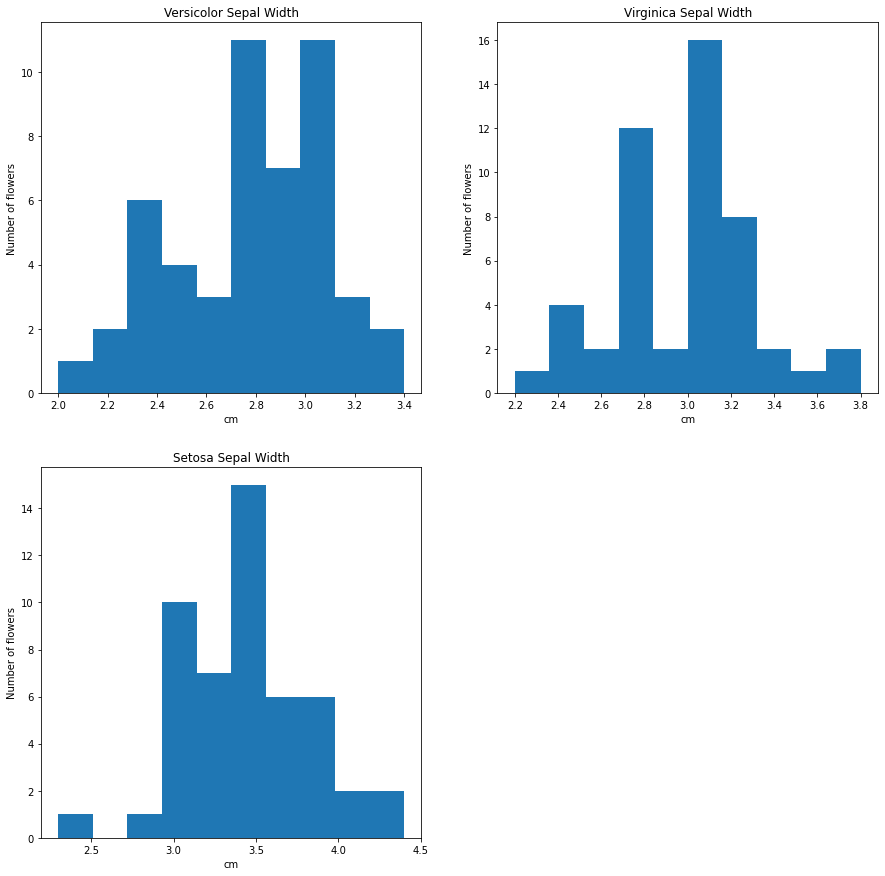

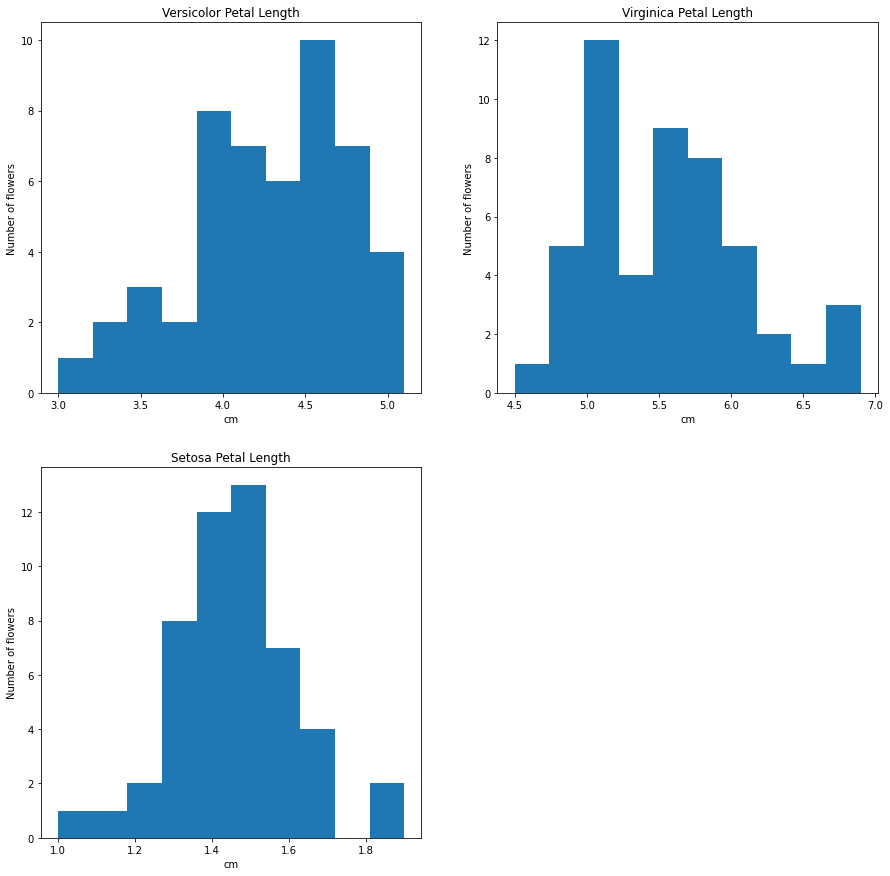

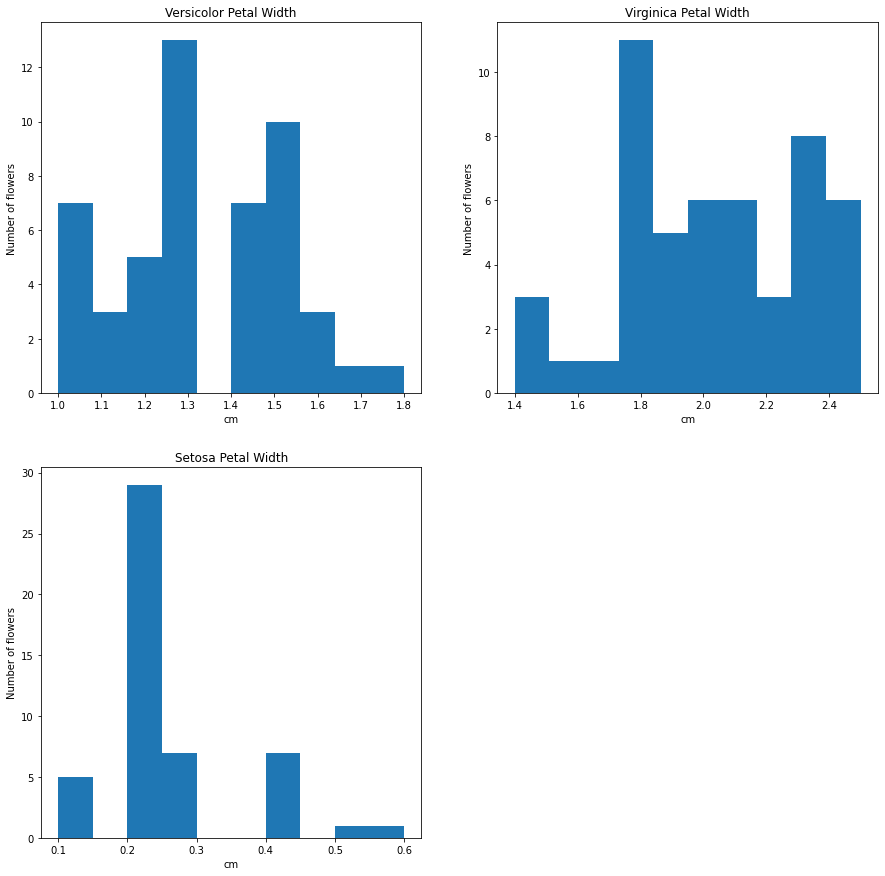

In [29]:
def get_mean(col_name): # calculates the mean
    mean = round(df[col_name].mean(), 6)
    return mean

def get_variance(col_name):# calculates the variance
    variance = round(df[col_name].var(), 6)
    return variance

# Beginning to calculate mean and variance for each column
avg_sepLength = get_mean("sepal length")
var_sepLength = get_variance("sepal length")
print("Mean for sepal length: " + str(avg_sepLength) + " cm")
print("Variance for sepal length: " + str(var_sepLength) + " cm\n")

avg_sepWidth = get_mean("sepal width")
var_sepWidth = get_variance("sepal width")
print("Mean for sepal width: " + str(avg_sepWidth) + " cm")
print("Variance for sepal width: " + str(var_sepWidth) + " cm\n")

avg_petLength = get_mean("petal length")
var_petLength = get_variance("petal length")
print("Mean for petal length: " + str(avg_petLength) + " cm")
print("Variance for petal length: " + str(var_petLength) + " cm\n")

avg_petWidth = get_mean("petal width")
var_petWidth = get_variance("petal width")
print("Mean for petal width: " + str(avg_petWidth) + " cm")
print("Variance for petal width: " + str(var_petWidth) + " cm\n")

df = df.dropna()
#print(df.isna().sum()) #testing to make sure there are no more null values

print("UPDATED MEAN AND VARIANCE BELOW\n")
#calculating updated mean and variance for each column
newavg_sepLength = get_mean("sepal length")
newvar_sepLength = get_variance("sepal length")
print("New Mean for sepal length: " + str(newavg_sepLength) + " cm")
print("New Variance for sepal length: " + str(newvar_sepLength) + " cm\n")

newavg_sepWidth = get_mean("sepal width")
newvar_sepWidth = get_variance("sepal width")
print("New Mean for sepal width: " + str(newavg_sepWidth) + " cm")
print("New Variance for sepal width: " + str(newvar_sepWidth) + " cm\n")

newavg_petLength = get_mean("petal length")
newvar_petLength = get_variance("petal length")
print("New Mean for petal length: " + str(newavg_petLength) + " cm")
print("New Variance for petal length: " + str(newvar_petLength) + " cm\n")

newavg_petWidth = get_mean("petal width")
newvar_petWidth = get_variance("petal width")
print("New Mean for petal width: " + str(newavg_petWidth) + " cm")
print("New Variance for petal width: " + str(newvar_petWidth) + " cm\n")

# Calculating the correlation between petal width and each of the other columns
sepLength_corr = df['petal width'].corr(df['sepal length'])
sepWidth_corr =  df['petal width'].corr(df['sepal width'])
petLength_corr = df['petal width'].corr(df['petal length'])
print('Correlation between petal width and sepal length: ' + str(sepLength_corr))
print('Correlation between petal width and sepal width: ' + str(sepWidth_corr))
print('Correlation between petal width and petal length: ' + str(petLength_corr) + "\n")

print('The correlation between petal width and petal length shows the strongest correlation \n' +
     'compared to the other elements. It shows a positive linear correlation. Petal width and sepal length \n' +
     'are second in correlation showing a positive linear correlation as well. Petal width and \n'
     + 'sepal width show no strong correlation.\n')

print(df.groupby('class').size()) #Getting the number of records that exists for each class
print('Each iris class has 50 records. There are 150 records total.\n')

np.random.seed(1234)

print(df.sample(n=20)) #randomly selecting 20 samples to display

plt.figure(figsize = (15, 15))
plotLoc = 1
for attributes in df[['sepal length', 'sepal width', 'petal length', 'petal width']]:
    plt.subplot(2,2, plotLoc)
    plt.hist(df[attributes]) #Plotting the data into a histogram
    plt.xlabel('cm') # x-axis will show measurement in cm
    plt.ylabel('Number of flowers') # y-axis will show the number of flowers dependent on the measure
    plt.title(attributes)
    plotLoc += 1 # updating for the next subplot location

versicolor = df.loc[df['class'] == 'Iris-versicolor']
virginica = df.loc[df['class'] == 'Iris-virginica']
setosa = df.loc[df['class'] == 'Iris-setosa']

# Plotting histograms for sepal length by class

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(versicolor['sepal length'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Versicolor Sepal Length')

plt.subplot(2,2,2)
plt.hist(virginica['sepal length'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Virginica Sepal Length')

plt.subplot(2,2,3)
plt.hist(setosa['sepal length'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Setosa Sepal Length')
plt.show()

# Plotting histograms for sepal width by class

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(versicolor['sepal width'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Versicolor Sepal Width')

plt.subplot(2,2,2)
plt.hist(virginica['sepal width'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Virginica Sepal Width')

plt.subplot(2,2,3)
plt.hist(setosa['sepal width'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Setosa Sepal Width')
plt.show()

# Plotting histograms for petal length by class

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(versicolor['petal length'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Versicolor Petal Length')

plt.subplot(2,2,2)
plt.hist(virginica['petal length'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Virginica Petal Length')

plt.subplot(2,2,3)
plt.hist(setosa['petal length'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Setosa Petal Length')
plt.show()

# Plotting histograms for petal width by class

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.hist(versicolor['petal width'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Versicolor Petal Width')

plt.subplot(2,2,2)
plt.hist(virginica['petal width'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Virginica Petal Width')

plt.subplot(2,2,3)
plt.hist(setosa['petal width'])
plt.xlabel('cm')
plt.ylabel('Number of flowers')
plt.title('Setosa Petal Width')
plt.show()

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

500 new samples mean: 3.7476824198138226
Original petal length mean: 3.7573333333333356


Ttest_1sampResult(statistic=-0.11665332346289985, pvalue=0.907181713485248)

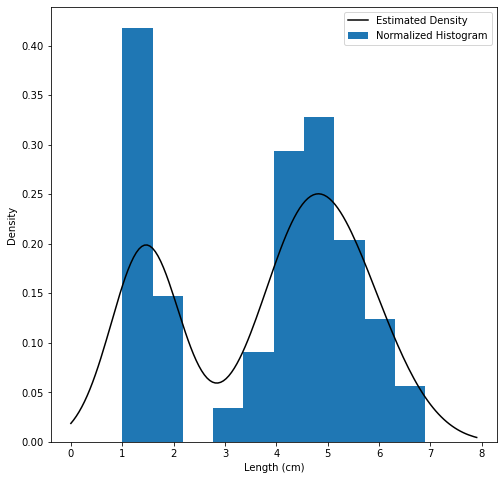

In [30]:
import scipy.stats

x1 = df['petal length']
xs = np.linspace(x1.min()-1, x1.max()+1, len(x1))


kde1 = scipy.stats.gaussian_kde(x1)

fig = plt.figure(figsize=(8, 8))

plt.hist(x1, density=True, label='Normalized Histogram')  # rug plot
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  # test your fit
plt.xlabel('Length (cm)')
plt.ylabel('Density')
plt.legend()

new_samples = kde1.resample(500)[0]
new_samples_mean = new_samples.mean()
print("500 new samples mean: " + str(new_samples_mean) + "\nOriginal petal length mean: " + str(x1.mean()))


scipy.stats.ttest_1samp(new_samples,x1.mean()) # Using the 500 samples and comparing how close the mean is to the given data

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

<BarContainer object of 3 artists>

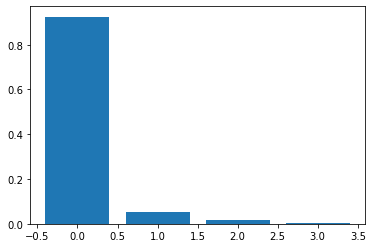

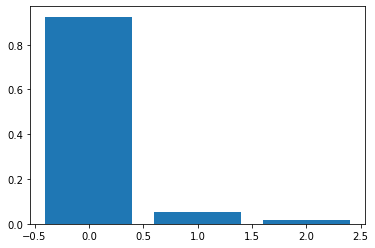

In [31]:
from sklearn.decomposition import PCA
import numpy as np

x = df.iloc[:, :-1].values #accessing all values except the 'class' column
# Create a regular PCA model 
pca_all = PCA()
reduced_data_pca = pca_all.fit_transform(x)
pca_all.explained_variance_ratio_
plt.bar(np.arange(4), pca_all.explained_variance_ratio_)
reduced_data_pca.shape


plt.figure()
pca = PCA(n_components=3)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(x)

# Inspect the shape
reduced_data_pca.shape
plt.bar(np.arange(3),pca.explained_variance_ratio_)

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

[[ 0.67750537 -0.31340702 -0.04387986]
 [-2.6470055   0.19038144  0.0141198 ]
 [ 2.37749847  0.26084641  0.05301478]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


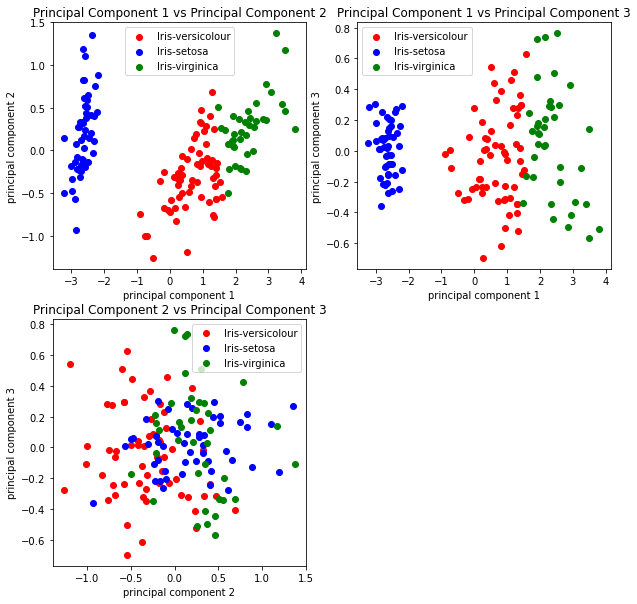

In [32]:
from sklearn.cluster import KMeans

x = reduced_data_pca
kmeans = KMeans(n_clusters= 3, random_state = 0) # 3 clusters for 3 classifications of the iris
kmeans.fit(x)
cluster_index = kmeans.predict(x) # computing the closest cluster each sample in x will belong to
centers = kmeans.cluster_centers_
print(centers)
print(kmeans.labels_)

plt.figure(figsize = (10, 10))

# principal component 1 vs principal component 2
plt.subplot(221) 
plt.scatter(x[cluster_index == 0, 0], x[cluster_index == 0, 1], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x[cluster_index == 1, 0], x[cluster_index == 1, 1], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x[cluster_index == 2, 0], x[cluster_index == 2, 1], c = 'green', label = 'Iris-virginica') 
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Principal Component 1 vs Principal Component 2')
plt.legend()

# principal component 1 vs principal component 3
plt.subplot(222)
plt.scatter(x[cluster_index == 0, 0], x[cluster_index == 0, 2], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x[cluster_index == 1, 0], x[cluster_index == 1, 2], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x[cluster_index == 2, 0], x[cluster_index == 2, 2], c = 'green', label = 'Iris-virginica') 
plt.xlabel('principal component 1')
plt.ylabel('principal component 3')
plt.title('Principal Component 1 vs Principal Component 3')
plt.legend()

# principal component 2 vs principal component 3
plt.subplot(223)
plt.scatter(x[cluster_index == 0, 1], x[cluster_index == 0, 2], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x[cluster_index == 1, 1], x[cluster_index == 1, 2], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x[cluster_index == 2, 1], x[cluster_index == 2, 2], c = 'green', label = 'Iris-virginica') 
plt.xlabel('principal component 2')
plt.ylabel('principal component 3')
plt.title('Principal Component 2 vs Principal Component 3')
plt.legend()
plt.show()

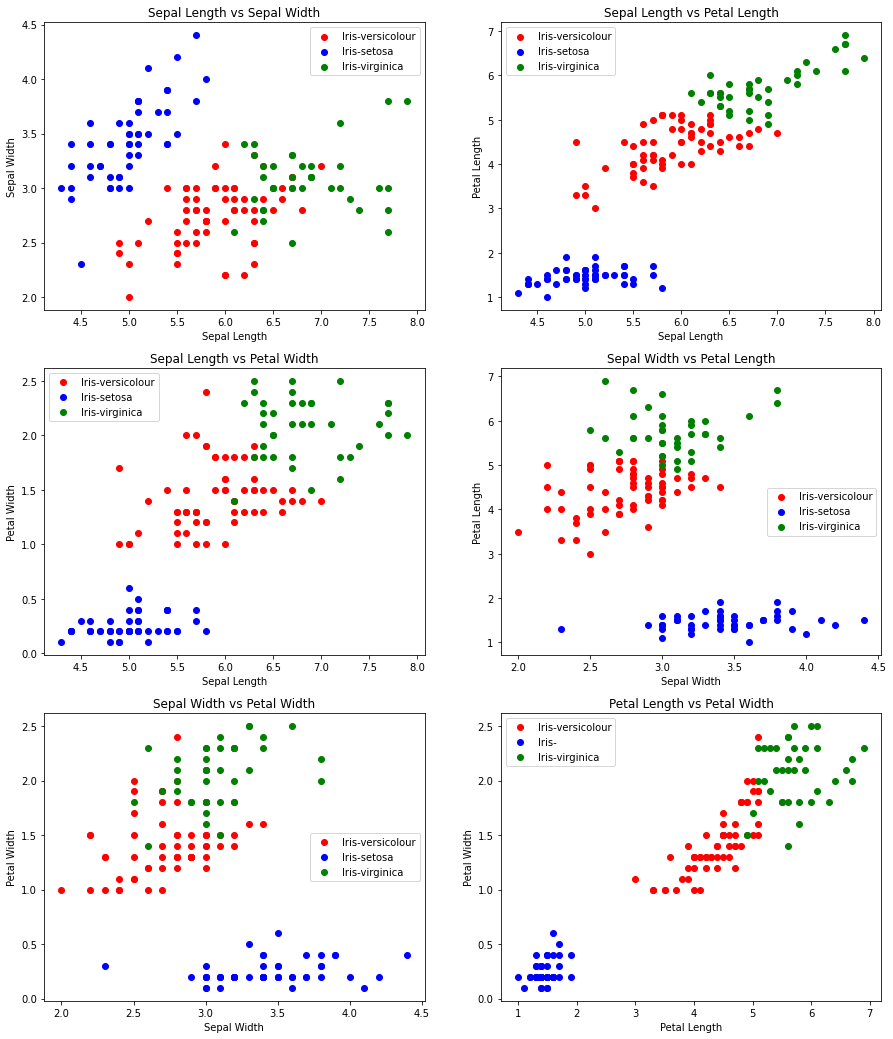

In [33]:
### THE FOLLOWING CODE IS KMEANS CLUSTERING WITHOUT THE PCA (4 Attributes and choosing 2 to compare)
# We see that the scatter plots that are being compared to sepal width does not show very strong correlation with the other
# attributes.
x2 = df.iloc[:, :-1].values
kmeans = KMeans(n_clusters= 3, random_state = 0) # 3 clusters for 3 classifications of the iris
kmeans.fit(x2)
cluster_index2 = kmeans.predict(x2) # computing the closest cluster each sample in x will belong to
centers = kmeans.cluster_centers_
#print(centers)
#print(kmeans.labels_)

fig2 = plt.figure(figsize = (15, 18))

# Sepal Length vs Sepal Width
plt.subplot(321) 
plt.scatter(x2[cluster_index2 == 0, 0], x2[cluster_index2 == 0, 1], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x2[cluster_index2 == 1, 0], x2[cluster_index2 == 1, 1], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x2[cluster_index2 == 2, 0], x2[cluster_index2 == 2, 1], c = 'green', label = 'Iris-virginica') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

# Sepal Length vs Petal Length
plt.subplot(322) 
plt.scatter(x2[cluster_index2 == 0, 0], x2[cluster_index2 == 0, 2], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x2[cluster_index2 == 1, 0], x2[cluster_index2 == 1, 2], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x2[cluster_index2 == 2, 0], x2[cluster_index2 == 2, 2], c = 'green', label = 'Iris-virginica') 
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.legend()

# Sepal Length vs Petal Width
plt.subplot(323) 
plt.scatter(x2[cluster_index2 == 0, 0], x2[cluster_index2 == 0, 3], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x2[cluster_index2 == 1, 0], x2[cluster_index2 == 1, 3], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x2[cluster_index2 == 2, 0], x2[cluster_index2 == 2, 3], c = 'green', label = 'Iris-virginica') 
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Sepal Length vs Petal Width')
plt.legend()

# Sepal Width vs Petal Length
plt.subplot(324) 
plt.scatter(x2[cluster_index2 == 0, 1], x2[cluster_index2 == 0, 2], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x2[cluster_index2 == 1, 1], x2[cluster_index2 == 1, 2], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x2[cluster_index2 == 2, 1], x2[cluster_index2 == 2, 2], c = 'green', label = 'Iris-virginica') 
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Sepal Width vs Petal Length')
plt.legend()

# Sepal Width vs Petal Width
plt.subplot(325) 
plt.scatter(x2[cluster_index2 == 0, 1], x2[cluster_index2 == 0, 3], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x2[cluster_index2 == 1, 1], x2[cluster_index2 == 1, 3], c = 'blue', label = 'Iris-setosa') 
plt.scatter(x2[cluster_index2 == 2, 1], x2[cluster_index2 == 2, 3], c = 'green', label = 'Iris-virginica') 
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Sepal Width vs Petal Width')
plt.legend()

# Petal Length vs Petal Width
plt.subplot(326) 
plt.scatter(x2[cluster_index2 == 0, 2], x2[cluster_index2 == 0, 3], c = 'red', label = 'Iris-versicolour') 
plt.scatter(x2[cluster_index2 == 1, 2], x2[cluster_index2 == 1, 3], c = 'blue', label = 'Iris-') 
plt.scatter(x2[cluster_index2 == 2, 2], x2[cluster_index2 == 2, 3], c = 'green', label = 'Iris-virginica') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#X = df.iloc[:, :-1] # accessing all columns except the 'class' column
Y = df.iloc[:,-1] # accessing the 'class' column to use for targets

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state = 0) #splitting the PCA reduced data 

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
training_accuracy = logisticRegr.score(x_train, y_train)
validation_accuracy = logisticRegr.score(x_test, y_test)
print('Training accuracy: ' + str(training_accuracy))
print('Validation accuracy: ' + str(validation_accuracy))

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

Training accuracy: 0.9666666666666667
Validation accuracy: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
